In [ ]:
import argparse
import dlib

In [ ]:
import torch

# Device and GDrive Mount

In [ ]:
from google.colab import drive #montar a drive

In [ ]:
# Mount the drive
drive.mount('/content/gdrive', force_remount=True)

In [ ]:
# Set the device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


# Read Info (i.e. Frame Division) from Excel

In [ ]:
import xlrd
import numpy as np

In [ ]:
 # Location in GDrive of excel with frame division
#loc = ("/content/gdrive/MyDrive/(...).xlsx")
loc = ("/content/gdrive/MyDrive/AnaMaria/Code/Frames.xlsx")

In [ ]:
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0) # sheet 4 of the excel has the relevant info
info=[]
for i in range(2, sheet.nrows): # 2 bc first 2 are headers
  info.append([])
  for j in [0,3,4,5]: # columns that I want - vid, startfr, endfr, kss
    # print(sheet.cell_value(i, j))
    info[-1].append(sheet.cell_value(i,j))
info = np.array(info)
print(info)

[['1-1' '1.0' '1318.0' '3.0']
 ['1-1' '16547.0' '17865.0' '6.0']
 ['1-2' '1.0' '659.0' '6.0']
 ['1-2' '8838.0' '9497.0' '7.0']
 ['1-3' '1.0' '659.0' '7.0']
 ['2-1' '1.0' '1318.0' '3.0']
 ['2-1' '16581.0' '17899.0' '7.0']
 ['2-2' '1.0' '659.0' '7.0']
 ['2-2' '8742.0' '9401.0' '6.0']
 ['2-3' '1.0' '659.0' '6.0']
 ['3-1' '1.0' '1318.0' '2.0']
 ['3-1' '16564.0' '17882.0' '3.0']
 ['3-2' '1.0' '659.0' '3.0']
 ['3-2' '8215.0' '8874.0' '4.0']
 ['3-3' '1.0' '659.0' '4.0']
 ['4-1' '1.0' '1318.0' '4.0']
 ['4-1' '16471.0' '17789.0' '8.0']
 ['4-2' '1.0' '659.0' '8.0']
 ['4-2' '7804.0' '8463.0' '9.0']
 ['4-3' '1.0' '659.0' '9.0']
 ['5-1' '1.0' '1318.0' '3.0']
 ['5-1' '16580.0' '17898.0' '7.0']
 ['5-2' '1.0' '659.0' '7.0']
 ['5-2' '7516.0' '8175.0' '8.0']
 ['5-3' '1.0' '659.0' '8.0']
 ['6-1' '1.0' '1318.0' '2.0']
 ['6-1' '16595.0' '17913.0' '3.0']
 ['6-2' '1.0' '659.0' '3.0']
 ['6-2' '8193.0' '8852.0' '7.0']
 ['6-3' '1.0' '659.0' '7.0']
 ['7-2' '1.0' '659.0' '4.0']
 ['7-2' '7253.0' '7912.0' '9.0']
 [

# Labels 

In [ ]:
import glob, os
import time
import cv2

In [ ]:
# Location in GDrive of folder with the videos
vidspath = "/content/gdrive/MyDrive/AnaMaria/Data/DROZY/videos_i8/"
 
# Location in GDrive of folder with the desired images
framespath = "/content/gdrive/MyDrive/AnaMaria/Data/DROZY/videos_i8/frame_all3/" #(for example)

In [ ]:
#prepare labels
def prepare_label(v):
  labels=[]
  #v = v.astype(np.float)
  for KSS in v:
    if (KSS<=3): #alert
      label=1
    elif (KSS<=6): #moderate drowsiness
      label=2
    else: #severe drowsines
      label=3
 
    labels.append(label)
  return labels

  #prepare labels
def prepare_label2(KSS):

  if (KSS<=3): #alert
    label=1
  elif (KSS<=6): #moderate drowsiness
    label=2
  else: #severe drowsines
    label=3

  return label

In [ ]:
# Times and Durations
currentTime = time.time()
time0_frames = currentTime
KSSS=[]

# To save the frames in the framespath
os.chdir(framespath)
 
for file in glob.glob(vidspath+"*.mp4"): 
    # Get videos from DROZY in vidspath
    v_cap = cv2.VideoCapture(file)
 
    file = file.split('/')[-1]
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print("Starting: ", file, ", length: ", v_len) 
 
    Startfs = info[ info[:,0]==file[:-4], 1].astype(float).astype(int)
    Endfs   = info[ info[:,0]==file[:-4], 2].astype(float).astype(int)
    KSSs    = info[ info[:,0]==file[:-4], 3].astype(float).astype(int)
 
    count = 0
    for startf,endf, KSS in zip(Startfs, Endfs, KSSs):
      for _ in range(startf - count):
        success, image = v_cap.read()
      
      count = startf - 1
      print(file[:-4], count)
      while (success and count < endf):
        fname = f'vid{file[:-4]}_frame{count+1}_label{prepare_label2(KSS)}.jpg'
        cv2.imwrite(fname , image) 

        KSSS.append(KSS)
        print(len(KSSS),' value:',KSS, 'and label',prepare_label2(KSS))
        success, image = v_cap.read()
        count += 1
      
      print(file[:-4], count)
 
# Times and Durations
currentTime = time.time()
duration_frames = currentTime - time0_frames
print(duration_frames)

A saída de streaming foi truncada nas últimas 5000 linhas.
54283  value: 7 and label 3
54284  value: 7 and label 3
54285  value: 7 and label 3
54286  value: 7 and label 3
54287  value: 7 and label 3
54288  value: 7 and label 3
54289  value: 7 and label 3
54290  value: 7 and label 3
54291  value: 7 and label 3
54292  value: 7 and label 3
54293  value: 7 and label 3
54294  value: 7 and label 3
54295  value: 7 and label 3
54296  value: 7 and label 3
54297  value: 7 and label 3
54298  value: 7 and label 3
54299  value: 7 and label 3
54300  value: 7 and label 3
54301  value: 7 and label 3
54302  value: 7 and label 3
54303  value: 7 and label 3
54304  value: 7 and label 3
54305  value: 7 and label 3
54306  value: 7 and label 3
54307  value: 7 and label 3
54308  value: 7 and label 3
54309  value: 7 and label 3
54310  value: 7 and label 3
54311  value: 7 and label 3
54312  value: 7 and label 3
54313  value: 7 and label 3
54314  value: 7 and label 3
54315  value: 7 and label 3
54316  value: 7 a

In [ ]:
import os
import scipy.io

for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/AnaMaria/Data/DROZY/videos_i8/frame_all3/'):

  print(dirname)
  # Read each of the files.
  for filename in filenames:
    print(filename)

A saída de streaming foi truncada nas últimas 5000 linhas.
vid14-1_frame16837_label3.jpg
vid14-1_frame16838_label3.jpg
vid14-1_frame16839_label3.jpg
vid14-1_frame16840_label3.jpg
vid14-1_frame16841_label3.jpg
vid14-1_frame16842_label3.jpg
vid14-1_frame16843_label3.jpg
vid14-1_frame16844_label3.jpg
vid14-1_frame16845_label3.jpg
vid14-1_frame16846_label3.jpg
vid14-1_frame16847_label3.jpg
vid14-1_frame16848_label3.jpg
vid14-1_frame16849_label3.jpg
vid14-1_frame16850_label3.jpg
vid14-1_frame16851_label3.jpg
vid14-1_frame16852_label3.jpg
vid14-1_frame16853_label3.jpg
vid14-1_frame16854_label3.jpg
vid14-1_frame16855_label3.jpg
vid14-1_frame16856_label3.jpg
vid14-1_frame16857_label3.jpg
vid14-1_frame16858_label3.jpg
vid14-1_frame16859_label3.jpg
vid14-1_frame16860_label3.jpg
vid14-1_frame16861_label3.jpg
vid14-1_frame16862_label3.jpg
vid14-1_frame16863_label3.jpg
vid14-1_frame16864_label3.jpg
vid14-1_frame16865_label3.jpg
vid14-1_frame16866_label3.jpg
vid14-1_frame16867_label3.jpg
vid14-1_fra

In [ ]:
print(len(KSSS))
print(len(filenames))

59272
59272


In [ ]:
#convert labels
labels=prepare_label(KSSS)
print(labels)
labels=np.array(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# MTCNN: Detector + 5 landmarks

In [ ]:
pip install facenet-pytorch

     |████████████████████████████████| 1.9 MB 14.7 MB/s 


In [ ]:
from facenet_pytorch import MTCNN
import time
import numpy as np
from tqdm.notebook import tqdm #Python library that allows you to output a smart progress bar
import cv2
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
# Times and Durations
currentTime = time.time()
time0_MTCNN = currentTime

# DBN implemenation

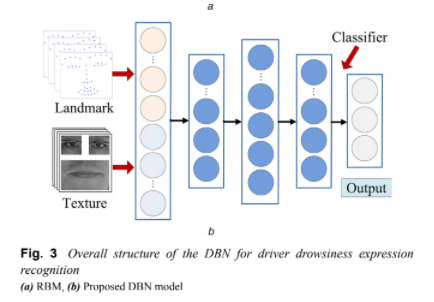

In [ ]:
%cd /content/gdrive/MyDrive/AnaMaria/Code/pytorch_face_landmark-master/
!ls

/content/gdrive/.shortcut-targets-by-id/18O_GriRxSZaQGskrxT6AzSnnQ4Ngaa7C/AnaMaria/Code/pytorch_face_landmark-master
ls: cannot open directory '.': Input/output error


In [ ]:
! git clone https://github.com/albertbup/deep-belief-network.git

fatal: destination path 'deep-belief-network' already exists and is not an empty directory.


In [ ]:
import deep_belief_network

In [ ]:
import numpy as np
import time
from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from deep_belief_network.dbn.models import UnsupervisedDBN, SupervisedDBNClassification

In [ ]:
#define model
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.02,
                                         learning_rate=0.05,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=100,
                                         batch_size=64,
                                         activation_function='relu',
                                         dropout_p=0.2)

# Modificação do codigo para guardar landmarks e textures

In [ ]:

def erro_reshape_bb(batch_boxes):
  j=0
  a=[]
  for i in batch_boxes:
    if (j==0):
      b=np.array(i)
      #a.append(j)
    else:
      print(j)
      if (i is None):
        print(i)
        a.append(j)
      else:
        b=np.concatenate((b,np.array(i)),axis=0)
        #a.append(j)

    j=j+1
  b=np.reshape(b,(len(b),1,4))

  return b, np.array(a)

def erro_reshape_bk(batch_boxes):
  j=0
  a=[]
  for i in batch_boxes:
    if (j==0):
      b=np.array(i)
    else:
      print(j)
      if (i is None):
        print(i)
        a=np.append(a,j)
      else:
        b=np.concatenate((b,np.array(i)),axis=0)

    j=j+1
  b=np.reshape(b,(len(b),1,5,2))

  return b, np.array(a)


In [ ]:
#version modif 
# Loop through videos in test folder
import tensorflow as tf
import random
from PIL import Image
import os
import PIL
import glob
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics.classification import accuracy_score
acc_score=[]
batch_size=64
split = 0

#filenames, x_test, labels, y_test=train_test_split (filenames, labels, test_size=0.3)

kf = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)  
# Initialize MTCNN
mtcnn = MTCNN(margin=40, select_largest=False, post_process=False, device=device)

for train_idx, valid_idx in kf.split(filenames,labels):


    # Initialize lists for this video
    frames = []
    boxes = []
    keypoints = []
    probabilities = []
    FaceWidths = []
    LEboxes = []
    centerMkeypoints = []
    Mboxes = []
    cropframesLE = []
    cropframesM = []
    points=[]
    labels2=[]
    j=0
    
    random.shuffle(train_idx)
    # Load frame
    train=train_idx[split*1500:1500*(1+split)]
    split += 1
    if (split<=1):
      for i in train:
          
          path = '/content/gdrive/MyDrive/AnaMaria/Data/DROZY/videos_i8/frame_all3/' + str(filenames[i])
          print(path)
          src = cv2.imread(path)

          # Add to batch, resizing for speed
          frame = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
          frame = Image.fromarray(frame)
          frame = frame.resize([int(f * 0.75) for f in frame.size])
          frames.append(frame)
          print(len(frames))
          labels2.append(labels[i])
          print(len(labels2))
          j=j+1
          
          # When batch is full, detect faces and reset batch list
          if (j== len(train)):
              frames3=frames
              frames=[]
              print(labels2)
              batch_boxes, batch_probabilities, batch_keypoints = mtcnn.detect(frames3, landmarks=True) 

              nofaceIndexes = []
              for bindex, (bbox, boxkeypoints, bprobabilities) in enumerate(zip(batch_boxes, batch_keypoints, batch_probabilities)):
                # When a batch box has a face
                if bbox is not None:
                  if bbox.shape[0]!=1:
                    batch_boxes[bindex]=bbox[np.argmax(bprobabilities)].reshape([1,4]) #possible problems!
                    batch_keypoints[bindex]=boxkeypoints[np.argmax(bprobabilities)].reshape([1,5,2])
                
                # When a batch box has absolutely no face
                else:
                  print('no face now')
                  nofaceIndexes.append(bindex)
    
                save = batch_boxes.copy()
                batch_boxes = np.delete(batch_boxes,nofaceIndexes,axis=0) 
                batch_keypoints = np.delete(batch_keypoints,nofaceIndexes,axis=0)
                print('facenot', nofaceIndexes)
                print('shape box', batch_boxes.shape)

                batch_boxes, a= erro_reshape_bb(batch_boxes)
                print('batch_keypoints', batch_keypoints.shape)
                batch_keypoints, b= erro_reshape_bk(batch_keypoints)
                print('batch_keypoints', batch_keypoints.shape)
    
                # Reconverter in array with the right shape     
                batch_boxes = np.array(list(batch_boxes))
                batch_keypoints = np.array(list(batch_keypoints))
                
    
                # Get the face (box) width and height
                print('bacth_boxes.shape: ', batch_boxes.shape)

                batch_FaceWidth  = batch_boxes[:,:,2]-batch_boxes[:,:,0]
                batch_FaceHeight = batch_boxes[:,:,3]-batch_boxes[:,:,1]
    
                # Get boxes for left eye for the batch
                batch_LEboxes = np.array([batch_keypoints[:,:,1,0]-0.1*batch_FaceWidth,
                                batch_keypoints[:,:,1,1]-0.075*batch_FaceHeight,
                                batch_keypoints[:,:,1,0]+0.1*batch_FaceWidth,
                                batch_keypoints[:,:,1,1]+0.075*batch_FaceHeight]).T
                # Make a center mouth keypoint
                batch_centerMkeypoints = [(batch_keypoints[:,:,4,0] + batch_keypoints[:,:,3,0]) * 0.5,
                                          (batch_keypoints[:,:,4,1] + batch_keypoints[:,:,3,1]) * 0.5]
                # Get boxes for mouth for the batch
                batch_Mboxes = np.array([batch_centerMkeypoints[0]-0.15*batch_FaceWidth,
                                batch_centerMkeypoints[1]-0.075*batch_FaceHeight,
                                batch_centerMkeypoints[0]+0.15*batch_FaceWidth,
                                batch_centerMkeypoints[1]+0.075*batch_FaceHeight]).T
    
                # Get croped frames for the batch (face, LE and M)
                batch_cropframesLE = []
                batch_cropframesM = []

                #frames2=[]
                frames2=frames3
                j=0
                if (len(nofaceIndexes)!=0):
                  for g in nofaceIndexes: 
                    frames2.pop(g)
                    train_idx=np.delete(train_idx,g)
                    #train_idx.remove(g)

                if (len(a)!=0):
                  for g in a: 
                    frames2.pop(g)
                    train_idx=np.delete(train_idx,g)
                
                i=0
                print('error',batch_LEboxes.shape)
                print('frames2',len(frames2))
                for im in frames2:
                      cropframeLE=im.crop((batch_LEboxes[0,i,0],batch_LEboxes[0,i,1],int(batch_LEboxes[0,i,0]+0.2*batch_FaceWidth[i]), int(batch_LEboxes[0,i,1]+0.15*batch_FaceHeight[i])))                  #cropframeRE=im.crop((batch_REboxes[0,i,0],batch_REboxes[0,i,1],int(batch_REboxes[0,i,0]+0.2*batch_FaceWidth[i]), int(batch_REboxes[0,i,1]+0.15*batch_FaceHeight[i])))
                      cropframeM=im.crop((batch_Mboxes[0,i,0],batch_Mboxes[0,i,1],int(batch_Mboxes[0,i,0]+0.2*batch_FaceWidth[i]), int(batch_Mboxes[0,i,1]+0.15*batch_FaceHeight[i])))

                      cropframeLE=cropframeLE.resize((9,9))
                      cropframeLE=np.reshape(cropframeLE,(9*9*3,))
                      batch_cropframesLE.append(np.array(cropframeLE))

                      cropframeM=np.array(cropframeM.resize((9,9)))
                      cropframeM=np.reshape(cropframeM,(9*9*3,))
                      batch_cropframesM.append(np.array(cropframeM))
                      i=i+1

                print('Mshape',np.asarray(batch_cropframesM).shape)
                print('LEshape',np.asarray(batch_cropframesLE).shape)

                input=np.concatenate((batch_cropframesM,batch_cropframesLE),axis=1)
                print('input',input.shape)
                for j in range(len(batch_keypoints)):
                  a=batch_keypoints[j].reshape((1*5*2,))
                  points=np.append(points,a)

                p=points[0:(len(input)*10)]
                points=np.reshape(p,(len(input),1*5*2))
                input=np.concatenate((input,points),axis=1)
                print(input.shape)
                print(len(labels2))
                print('split:', split)
                classifier.fit(input,np.array(labels2))
                #classifier.save( '/content/gdrive/MyDrive/AnaMaria/model/')



      # Load frame
      valid=valid_idx[0:500]
      for i in valid_idx:
          path = '/content/gdrive/MyDrive/AnaMaria/Data/DROZY/videos_i8/frame_all3/' + str(filenames[i])
          print(path)
          src = cv2.imread(path)

          # Add to batch, resizing for speed
          frame = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
          frame = Image.fromarray(frame)
          frame = frame.resize([int(f * 0.75) for f in frame.size])
          frames.append(frame)
          print(len(frames))
          labels2.append(labels[i])
          print(len(labels2))
          j=j+1
          
          # When batch is full, detect faces and reset batch list
          if j== len(valid):
              frames3=frames
              frames=[]
              print(labels2)
              batch_boxes, batch_probabilities, batch_keypoints = mtcnn.detect(frames3, landmarks=True) 

              nofaceIndexes = []
              for bindex, (bbox, boxkeypoints, bprobabilities) in enumerate(zip(batch_boxes, batch_keypoints, batch_probabilities)):
                # When a batch box has a face
                if bbox is not None:
                  # When a batch box has more than one face
                  if bbox.shape[0]!=1:
                    # Make only the first one count and reshape
                    batch_boxes[bindex]=bbox[np.argmax(bprobabilities)].reshape([1,4]) #possible problems!
                    batch_keypoints[bindex]=boxkeypoints[np.argmax(bprobabilities)].reshape([1,5,2])
                
                # When a batch box has absolutely no face
                else:
                  print('no face now')
                  nofaceIndexes.append(bindex)
    
                save = batch_boxes.copy()
                batch_boxes, a = np.delete(batch_boxes,nofaceIndexes,axis=0) 
                batch_keypoints, b = np.delete(batch_keypoints,nofaceIndexes,axis=0)
                print('facenot', nofaceIndexes)
                print('shape marada', batch_boxes.shape)


                batch_boxes= erro_reshape_bb(batch_boxes)
                print('batch_keypoints', batch_keypoints.shape)
                batch_keypoints= erro_reshape_bk(batch_keypoints)
                print('batch_keypoints', batch_keypoints.shape)
    
                # Reconverter in array with the right shape     
                batch_boxes = np.array(list(batch_boxes))
                batch_keypoints = np.array(list(batch_keypoints))
                
    
                # Get the face (box) width and height
                print('bacth_boxes.shape: ', batch_boxes.shape)

                batch_FaceWidth  = batch_boxes[:,:,2]-batch_boxes[:,:,0]
                batch_FaceHeight = batch_boxes[:,:,3]-batch_boxes[:,:,1]
    
                # Get boxes for left eye for the batch
                batch_LEboxes = np.array([batch_keypoints[:,:,1,0]-0.1*batch_FaceWidth,
                                batch_keypoints[:,:,1,1]-0.075*batch_FaceHeight,
                                batch_keypoints[:,:,1,0]+0.1*batch_FaceWidth,
                                batch_keypoints[:,:,1,1]+0.075*batch_FaceHeight]).T
                # Make a center mouth keypoint
                batch_centerMkeypoints = [(batch_keypoints[:,:,4,0] + batch_keypoints[:,:,3,0]) * 0.5,
                                          (batch_keypoints[:,:,4,1] + batch_keypoints[:,:,3,1]) * 0.5]
                # Get boxes for mouth for the batch
                batch_Mboxes = np.array([batch_centerMkeypoints[0]-0.15*batch_FaceWidth,
                                batch_centerMkeypoints[1]-0.075*batch_FaceHeight,
                                batch_centerMkeypoints[0]+0.15*batch_FaceWidth,
                                batch_centerMkeypoints[1]+0.075*batch_FaceHeight]).T
    
                # Get croped frames for the batch (face, LE and M)
                batch_cropframesLE = []
                batch_cropframesM = []

                #frames2=[]
                frames2=frames3
                print(len(frames2))
                j=0
                if (len(nofaceIndexes)!=0):
                  for g in nofaceIndexes: 
                    frames2.pop(g)
                    train_idx=np.delete(train_idx,g)
                    #train_idx.remove(g)

                if (len(a)!=0):
                  for g in a: 
                    frames2.pop(g)
                    train_idx=np.delete(train_idx,g)
                

                i=0
                print('error',batch_LEboxes.shape)
                print('frames2',len(frames2))
                for im in frames2:
                      cropframeLE=im.crop((batch_LEboxes[0,i,0],batch_LEboxes[0,i,1],int(batch_LEboxes[0,i,0]+0.2*batch_FaceWidth[i]), int(batch_LEboxes[0,i,1]+0.15*batch_FaceHeight[i])))                  #cropframeRE=im.crop((batch_REboxes[0,i,0],batch_REboxes[0,i,1],int(batch_REboxes[0,i,0]+0.2*batch_FaceWidth[i]), int(batch_REboxes[0,i,1]+0.15*batch_FaceHeight[i])))
                      cropframeM=im.crop((batch_Mboxes[0,i,0],batch_Mboxes[0,i,1],int(batch_Mboxes[0,i,0]+0.2*batch_FaceWidth[i]), int(batch_Mboxes[0,i,1]+0.15*batch_FaceHeight[i])))

                      cropframeLE=cropframeLE.resize((9,9))
                      cropframeLE=np.reshape(cropframeLE,(9*9*3,))
                      batch_cropframesLE.append(np.array(cropframeLE))

                      cropframeM=np.array(cropframeM.resize((9,9)))
                      cropframeM=np.reshape(cropframeM,(9*9*3,))
                      batch_cropframesM.append(np.array(cropframeM))
                      i=i+1

                print('Mshape',np.asarray(batch_cropframesM).shape)
                print('LEshape',np.asarray(batch_cropframesLE).shape)

                input=np.concatenate((batch_cropframesM,batch_cropframesLE),axis=1)
                print('input',input.shape)
                for j in range(len(batch_keypoints)):
                  a=batch_keypoints[j].reshape((1*5*2,))
                  points=np.append(points,a)

                p=points[0:(len(input)*10)]
                points=np.reshape(p,(len(input),1*5*2))
                input=np.concatenate((input,points),axis=1)
                print(input.shape)
                print(len(labels2))

                y_pred=classifier.predict(input)
                acc=accuracy_score(lables2, Y_pred)
                print('accuracy= ', acc)
                acc_score.append(acc)
                np.save('/content/gdrive/MyDrive/AnaMaria/accuracy.npy',acc_score)

